
# <span style="color:rgb(213,80,0)">Balance sheets data.</span>

This file creates Figure 6.12-6.13 and Table 6.2.

## Beginning of code

In [1]:
XX=load('BalanceSheets.txt');
% Define X and y
y=XX(:,6);
X=XX(:,1:5);
prin=0;
outtra=FSR(y,X,'plots',0);

Observed curve of r_min is at least 10 times greater than 99.99% envelope
--------------------------------------------------
-------------------------
Signal detection loop
Tentative signal in central part of the search: step m=937 because
rmin(937,1405)>99.99% and rmin(936,1405)>99.99% and rmin(938,1405)>99.99%
-------------------
Signal validation exceedance of upper envelopes
Validated signal
-------------------------------
Start resuperimposing envelopes from step m=936
Superimposition stopped because r_{min}(1023,1229)>99.9% envelope
Subsample of 1228 units is not homogeneous because the curve was above 99.99% and later it was below 1%
----------------------------------------
Probably there are two overlapping groups
Using the criterion of the maximum, the group of homogenous obs. is= 1206
----------------------------
Final output
Number of units declared as outliers=199
Summary of the exceedances
           1          99         999        9999       99999
          11         80

In [2]:
p=size(X,2)+1;
n=length(y);

## Create Figure 6.12 (top panel)

In [3]:
ylimy=20;
nini=1000;
la=[0.5 0.75 1 1.25];
out=FSRfan(y,X,'la',la,'family','YJ','plots',0,'init',round(nini/2), ...
    'ylimy',[-ylimy ylimy]);

Total estimated time to complete LMS:  0.07 seconds 
m=1000
Total estimated time to complete LMS:  0.04 seconds 
m=1000
Total estimated time to complete LMS:  0.03 seconds 
m=1000
Total estimated time to complete LMS:  0.03 seconds 
m=1000


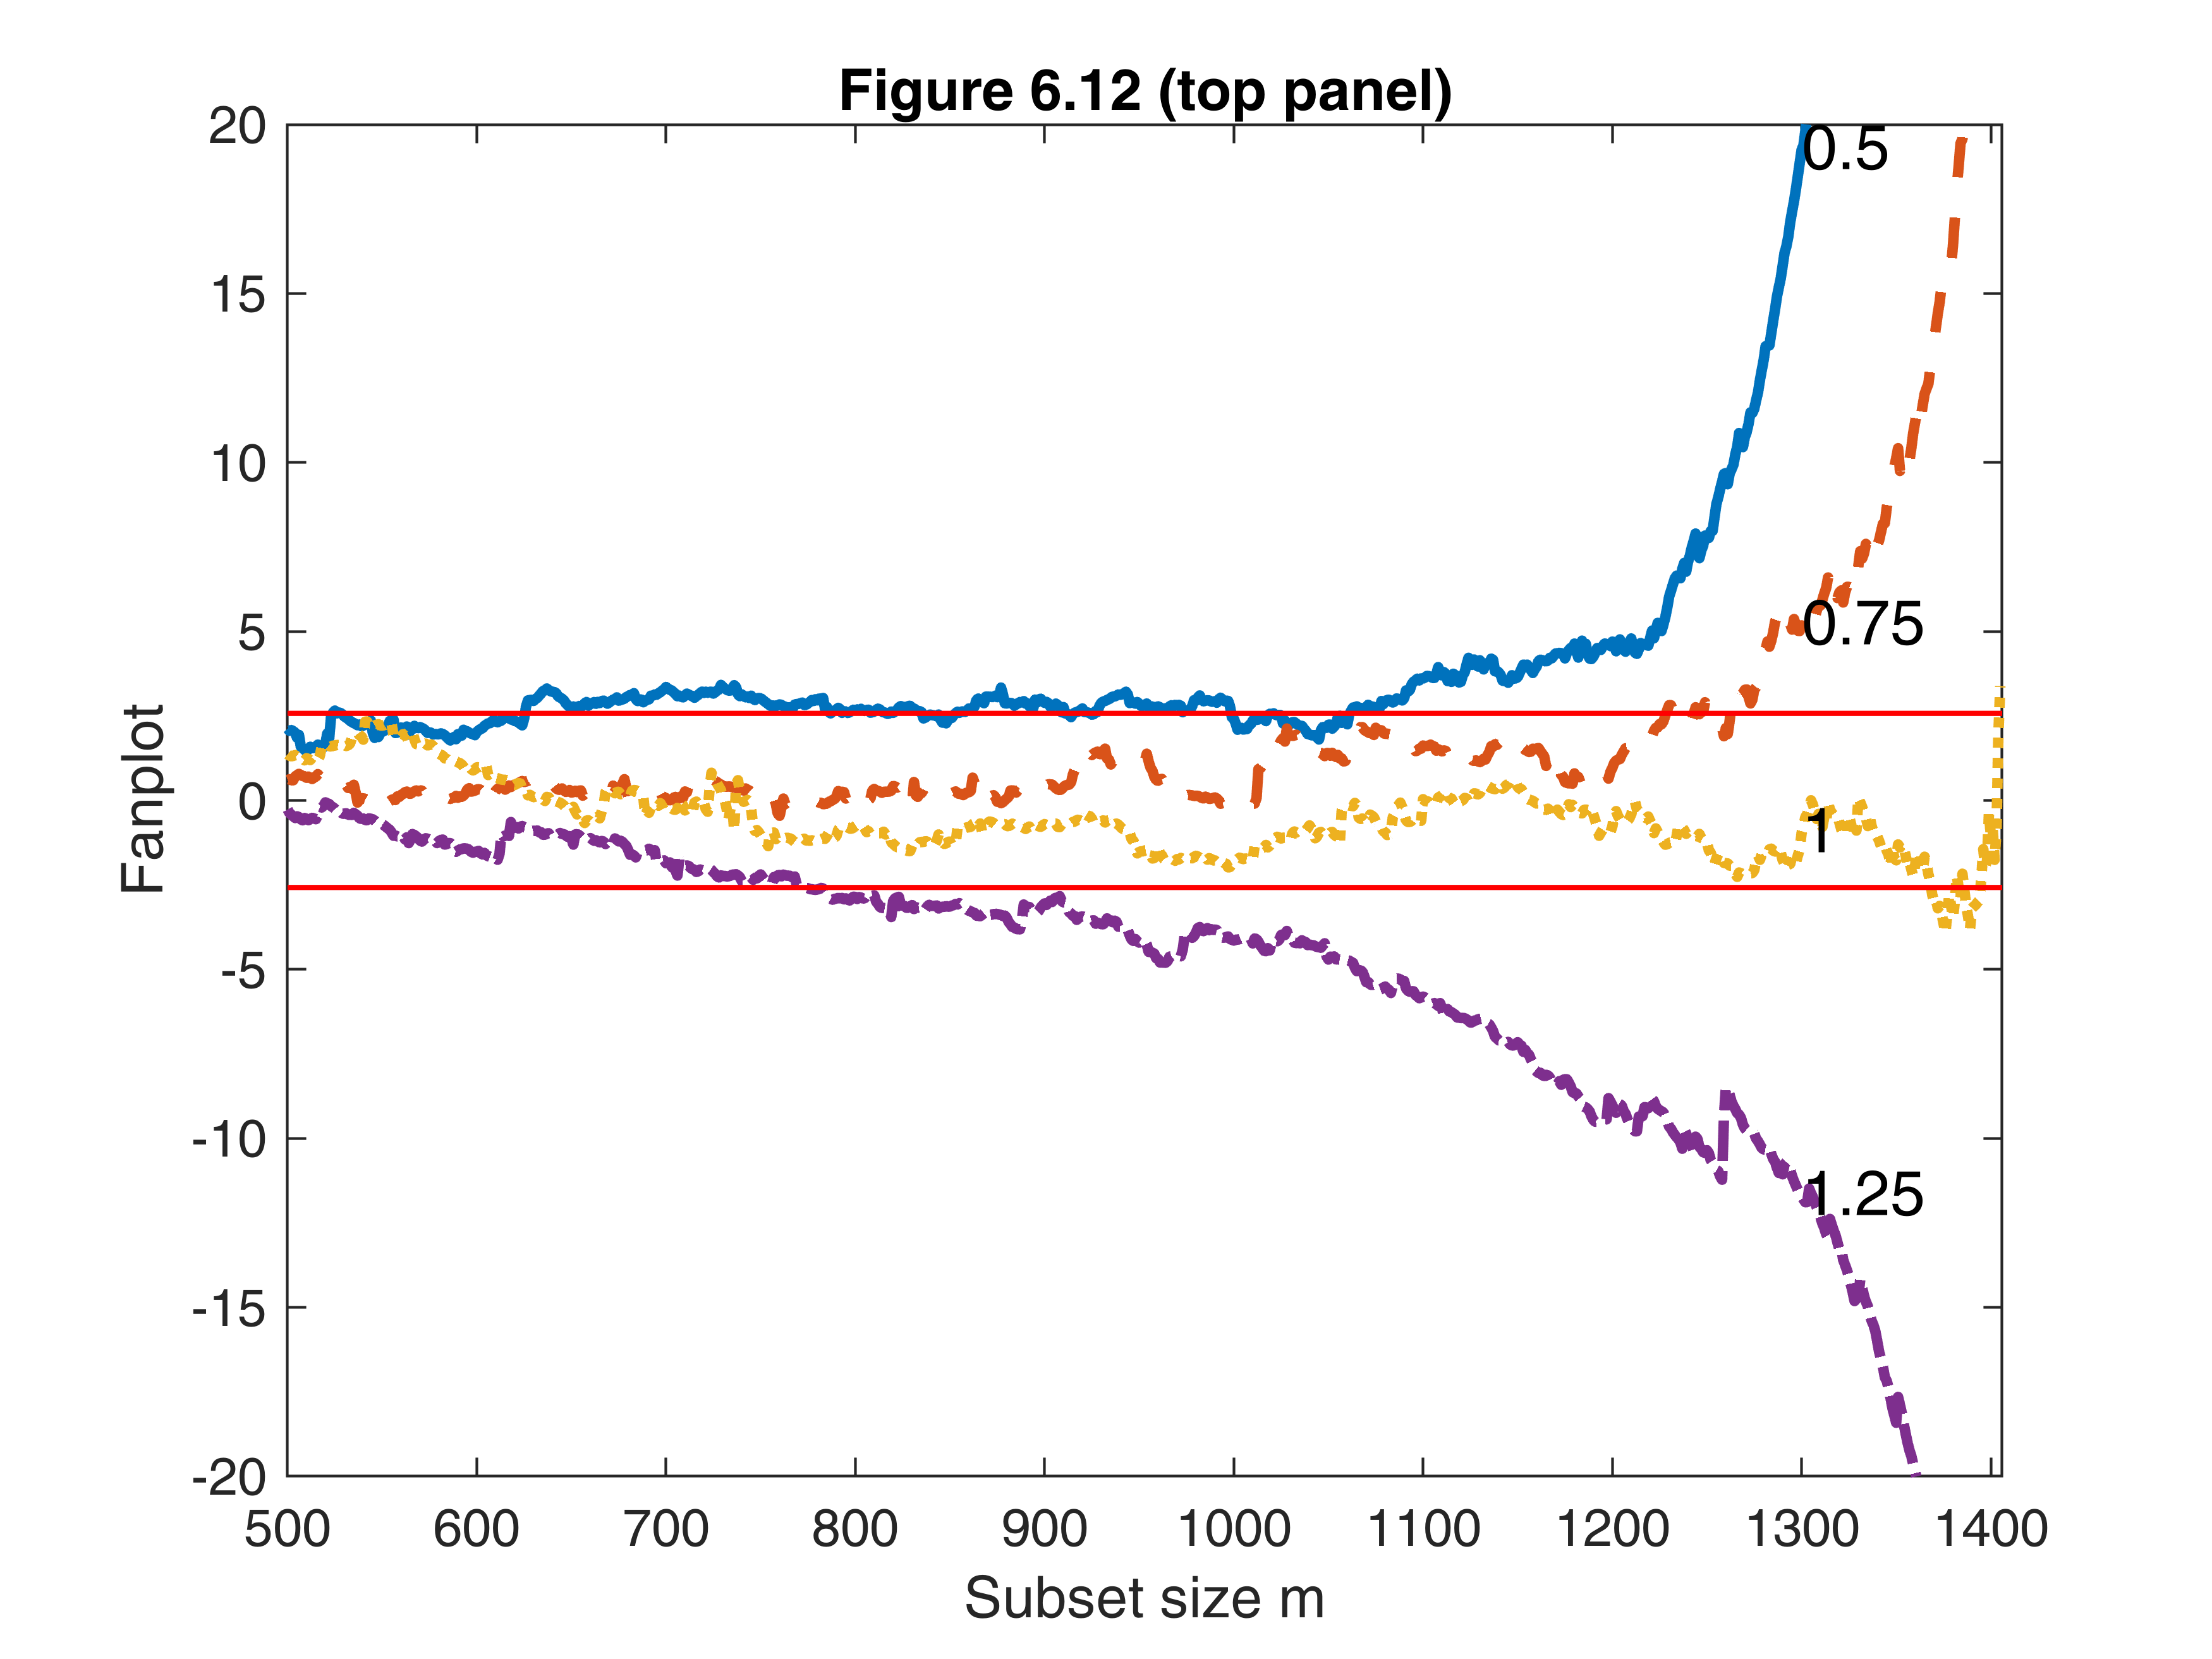

In [4]:
fanplotFS(out,'flabstep',1300,'laby','Fanplot','tag','pl_fanini');

title('Figure 6.12 (top panel)')
set(gcf,"Name",'Figure 6.12 (top panel)')

## Create Figure 6.12 (bottom panel)

In [5]:
ylimy1=12;
outpn=FSRfan(y,X,'la',1,'family','YJpn','plots',1, 'init',round(nini/2),...
    'ylimy',[-ylimy1 ylimy1],'laby','Extended fanplot');

Total estimated time to complete LMS:  0.04 seconds 
m=1000


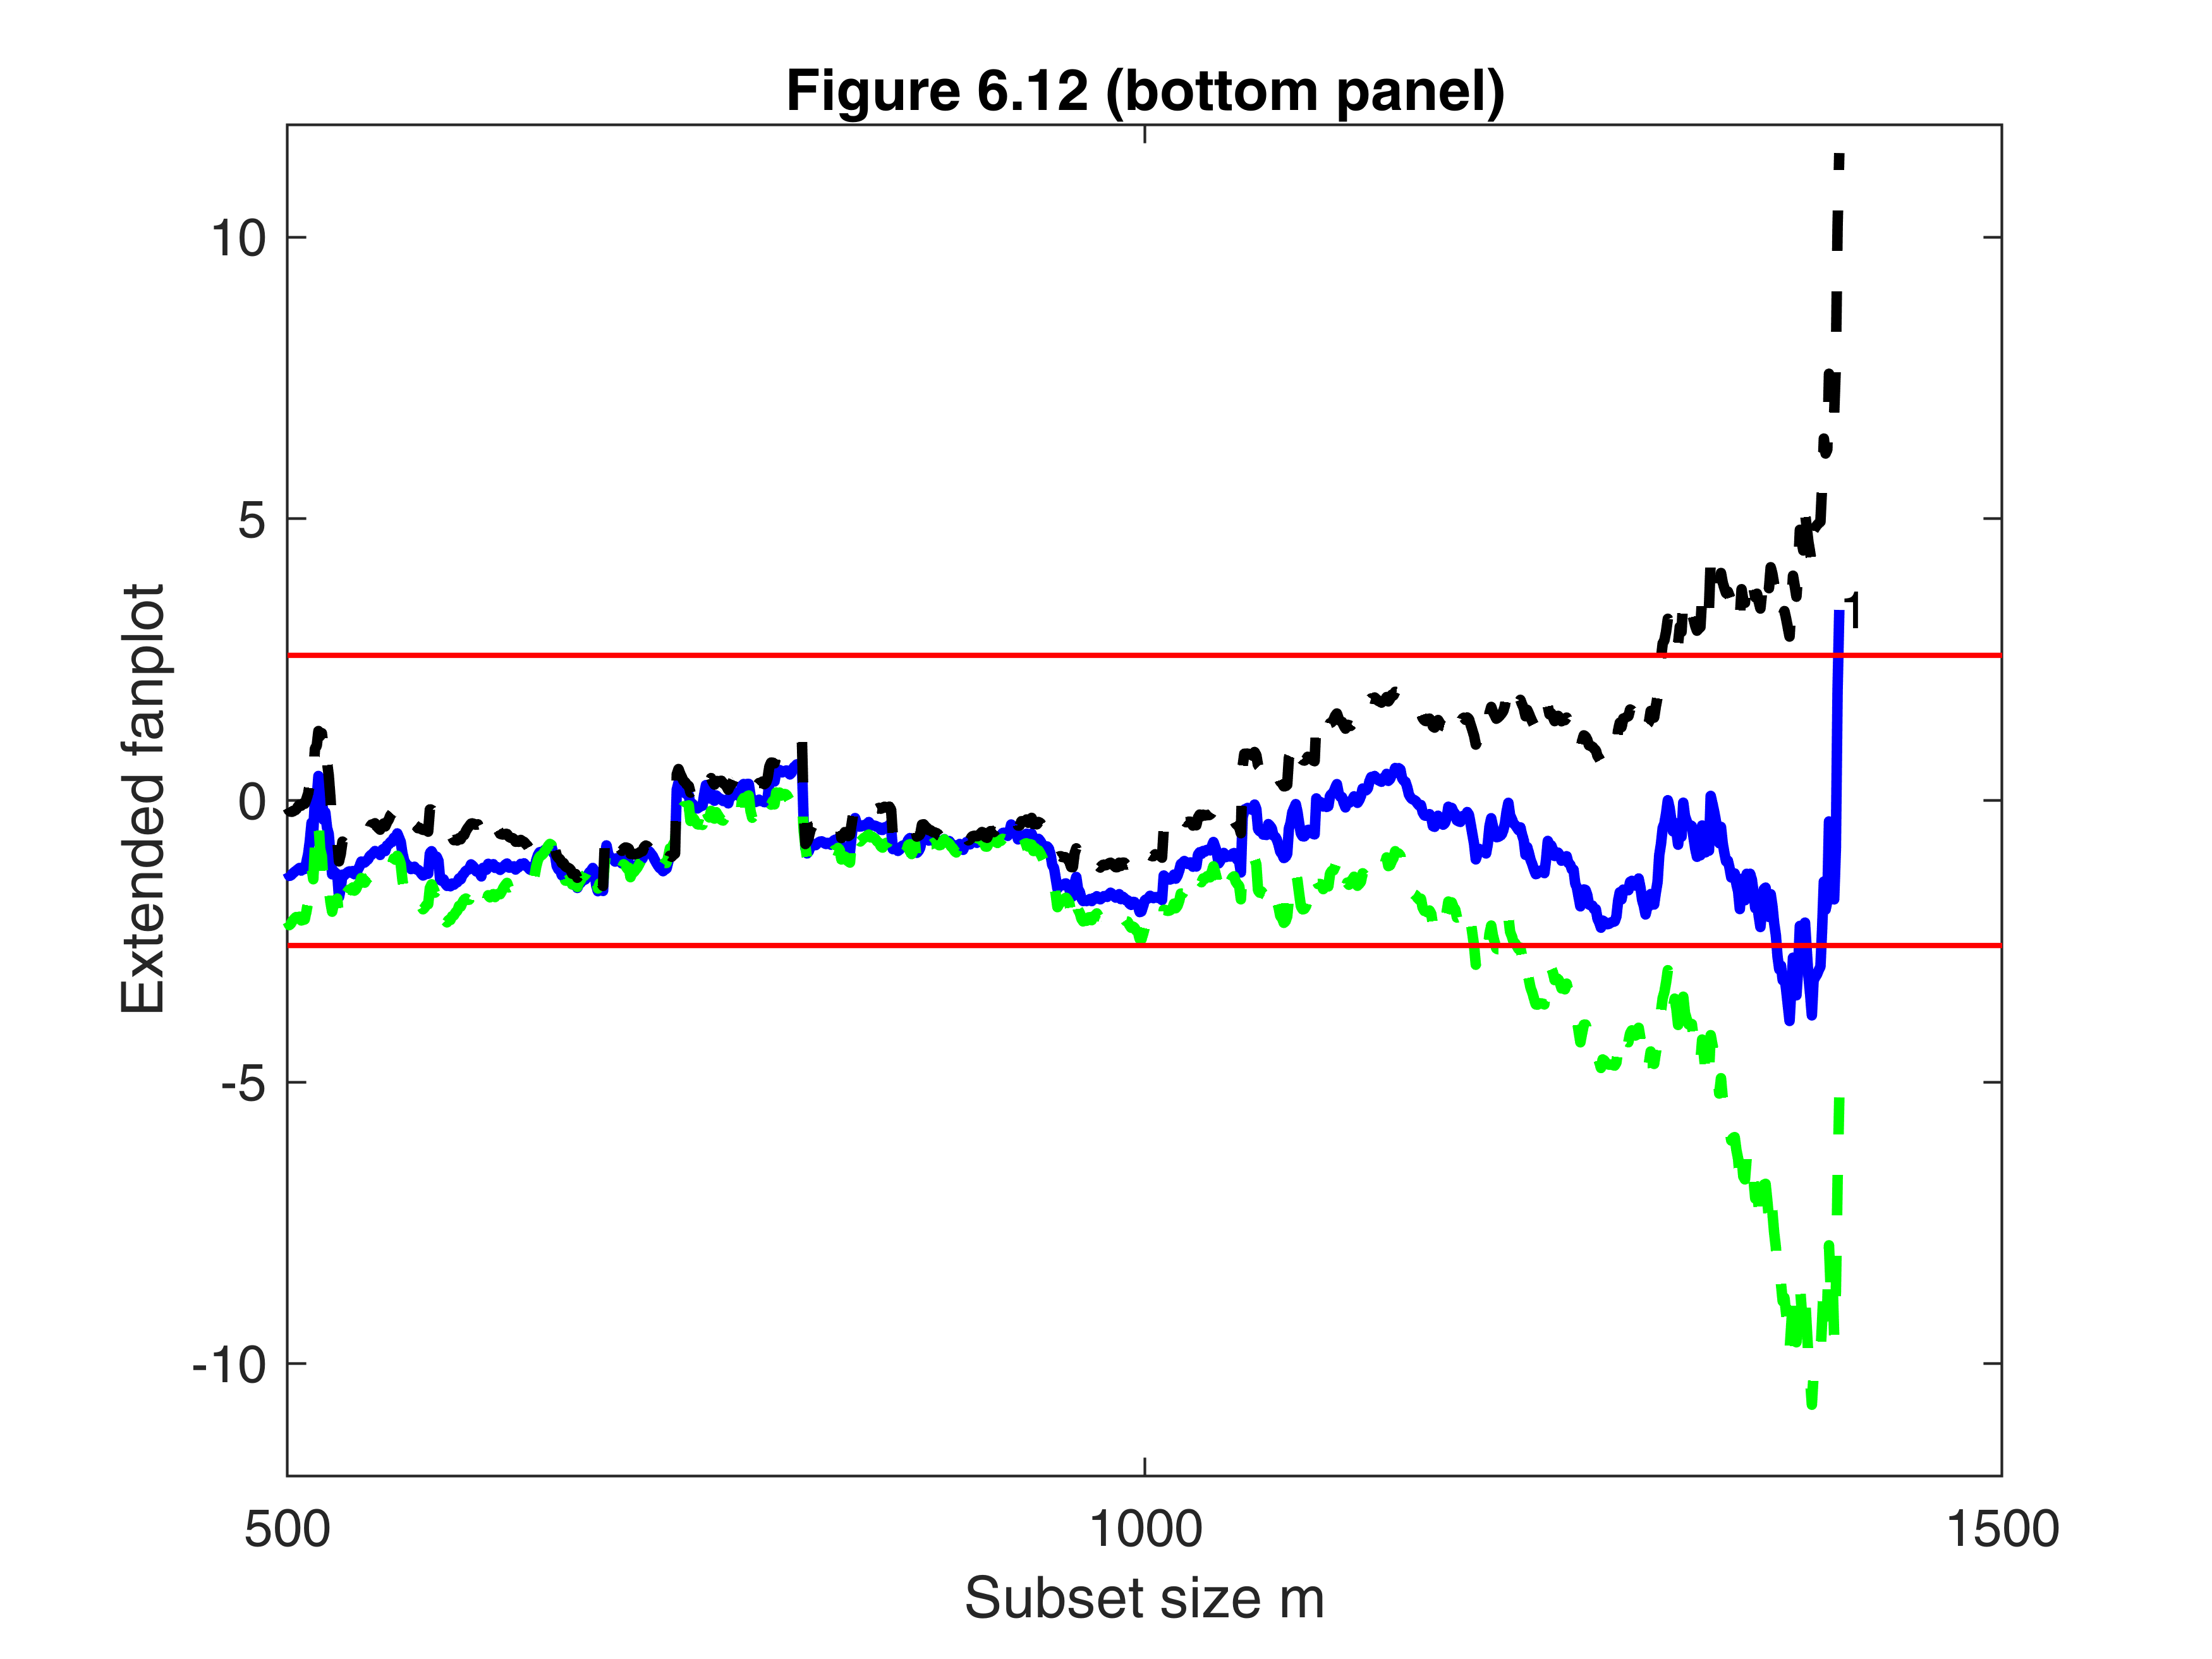

In [6]:

title('Figure 6.12 (bottom panel)')
set(gcf,"Name",'Figure 6.12 (bottom panel)')

In [7]:

if prin==1
    % print to postscript
    print -depsc figsBS\fanplotoriBS.eps;
end

## Create Figure 6.13

In [8]:
ytra=normYJpn(y, [], [0.5, 1.5], 'inverse',false, 'Jacobian', false);
outpn=FSRfan(ytra,X,'intercept',1,'plots',1,'family','YJpn','la',1, ...
    'laby','Extended fanplot','tag','plytra');

Total estimated time to complete LMS:  0.03 seconds 
m=1000


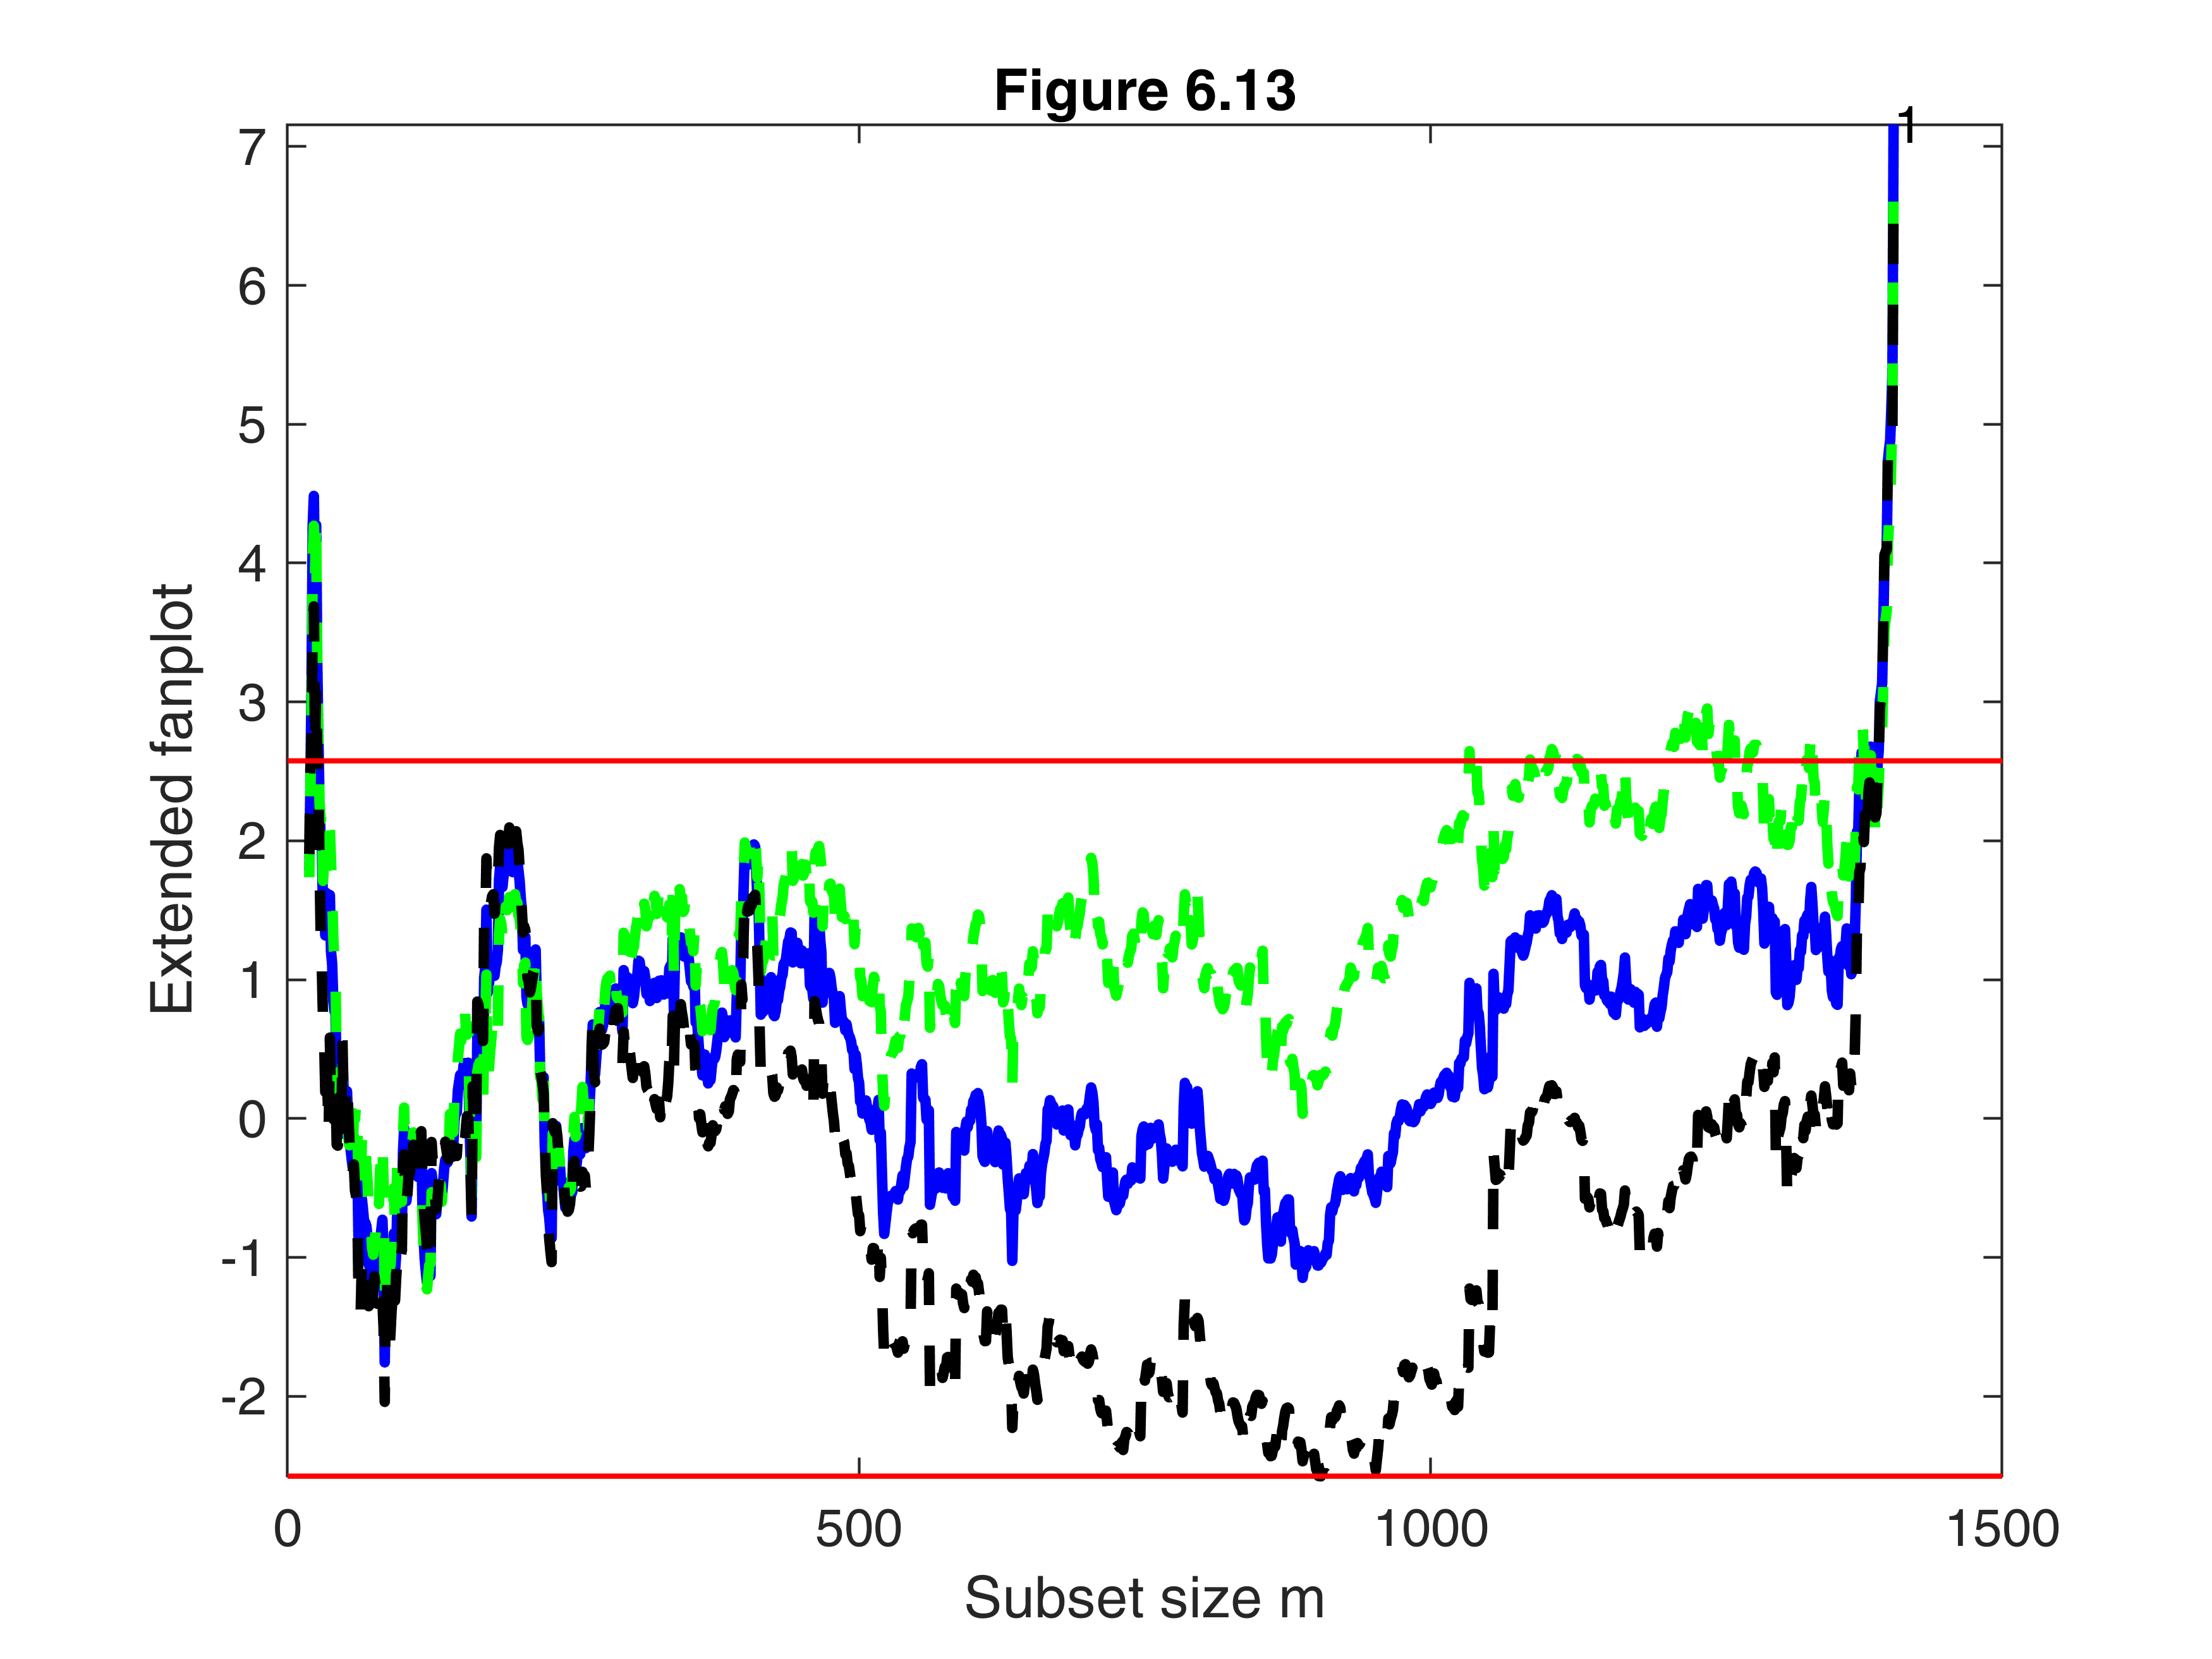

In [9]:
xlabel('Subset size m')

title('Figure 6.13')
set(gcf,"Name",'Figure 6.13')

In [10]:

if prin==1
    % print to postscript
    print -depsc figsBS\fanplottraBS.eps;
end

## Create Table 6.2

In [11]:
mdl=fitlm(X,y);
StoreFandR2=[mdl.ModelFitVsNullModel.Fstat;  mdl.Rsquared.Adjusted];

mdltra=fitlm(X,ytra,'Exclude',outtra.outliers);
StoreFandR2tra=[mdltra.ModelFitVsNullModel.Fstat;  mdltra.Rsquared.Adjusted];

laP=[1 0.5];
laN=[1 1.5];
nobs=[n n-length(outtra.outliers)];
mis=NaN(1,2);
tsta=[mdl.Coefficients{:,"tStat"} mdltra.Coefficients{:,"tStat"}];
FandR2=[StoreFandR2 StoreFandR2tra];
df=nobs-p;

namrow=["laP"; "laN"; "Number of observations"; "Error d.f. nu";
    "t_nu values"; "Intercept"; "x"+(1:5)'; "F5,nu for regression"; "R2adj"];
namcol=["All" "42 deleted"];

data=[laP; laN; nobs;df;mis; tsta; FandR2 ];
dataT=array2table(data,"RowNames",namrow,"VariableNames",namcol);
disp('Table 6.2')

Table 6.2

In [12]:
disp(dataT)

                                All      42 deleted
                              _______    __________
    laP                             1         0.5  
    laN                             1         1.5  
    Number of observations       1405        1206  
    Error d.f. nu                1399        1200  
    t_nu values                   NaN         NaN  
    Intercept                  42.028      60.368  
    x1                        -35.766     -51.599  
    x2                        -8.3224      -15.15  
    x3                        -3.5626     -4.4788  
    x4                        0.99481      1.5559  
    x5                        -3.3858     -1.7777  
    F5,nu for regression       292.61      588.89  
    R2adj                     0.50944     0.70925

In [13]:

%InsideREADME